## Objectives

The main goal of the case study is to build ML models to predict churn. The predictive model built has the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks. The predictive model built along with something like PCA could give us a high accuracy of preducting churn, but might not have the explanatory power to show us which variables are important for churn. Hence, a model like Decision Tree or Logistic Regression can be built alongside to help us interpret the important variables.

- Even though overall accuracy will be the primary evaluation metric,other metrics like precision, recall, etc. should also taken into account for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn.

- Recommend strategies to manage customer churn based on your observations.

#### Brief outline of different steps

Let's take a look at the high level steps followed to satisfy the objectives of this project.

- __Data Understanding, Preparation, and Pre-Processing__ :
    1. Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
    2. Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format.
\
<br>

- __Exploratory Data Analysis__ :
    1. Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
    2. Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data.
\
<br>

- __Feature Engineering and Variable Transformation__ :
    1. Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
    2. Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
\
<br>

- __Model Selection, Model Building, and  Prediction__ :
    1. Identifying the type of problem and making a list of decisive models from all available choices
    2. Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
    3. Testing each model on the respective model evaluation metric
    4. Choosing the best model based on the fit of the data set and output variable
    5. Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem
\
<br>

Alright, let's now proceed to perform the different steps outlined above.

#### 1. __Data Understanding, Preparation, and Pre-Processing__

In [155]:
#importing necessary libraries
import sys
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [156]:
#loading and reading the training data
data_path = os.path.join(os.getcwd(), 'telecom-churn-data')
train_path = os.path.join(data_path, 'train.csv')
train_df = pd.read_csv(train_path)
train_df.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

We can see that there are about 172 columns in our dataset. Let's take look at some more details about the datatypes of columns, the number of rows, whether or not null values are present, distribution of numerical variables and so on in the following steps.

In [157]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


There are about 70,000 rows in the dataset and 172 columns. 163 of them are numerical variables(float64: 135, int64: 28) columns and 9 of them are categorical variables(having object datatype).

In [158]:
train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

Let's take a look at the data dictionary and see what some of the variables/columns mean.

In [159]:
datadict_path = os.path.join(data_path, 'data_dictionary.csv')
datadict = pd.read_csv(datadict_path)
datadict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [160]:
#filter columns having prefix as loc_
train_df_loc = train_df.filter(regex='loc_')
train_df_loc.columns

Index(['loc_og_t2o_mou', 'loc_ic_t2o_mou', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'],
      dtype='object')

- loc - local calls within the same telecom circle
- ic/og - incoming/outgoing
- t2t - operator T to T ie within same operator
- t2f - operator T to fixed lines of T
- mou - minutes of usage
- *6,7,8 - KPI for the month of june,july and august respectively

The above columns represent different minutes of usage for the months june, july and august for different combinations of ```local``` calls mentioned above.

In [161]:
#let's look at some other columns
train_df_std = train_df.filter(regex='std_')
train_df_std.columns

Index(['std_og_t2o_mou', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'],
      dtype='object')

Similar to local calls, these represent STD calls outside the calling circle for different combinations.

In [162]:
train_df_isd = train_df.filter(regex='isd_')
train_df_isd.columns

Index(['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8'],
      dtype='object')

In [163]:
train_df_arpu = train_df.filter(regex='arpu_')
train_df_arpu.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

- arpu - average revenue per user
- 3g/2g - 3G/2G network
- *6,7,8 - KPI for the month of june,july and august respectively

These columns represent average revenue per user for 2G/3G networks for the months of june, july and august.

In [164]:
train_df_on = train_df.filter(regex='onnet_')
train_df_off = train_df.filter(regex='offnet_')

train_df_on.columns, train_df_off.columns

(Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object'),
 Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object'))

The above columns represent all calls within same operator network - ```onnet``` and all calls outside operator network - ```offnet```.

In [165]:
train_df_roam = train_df.filter(regex='roam_')
train_df_roam.columns

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8'],
      dtype='object')

Now that we have some understanding of what the columns mean, let's go ahead and do some more data exploration before performing EDA.

In [166]:
df_info = train_df.info(verbose=True, null_counts=True)
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        69999 non-null  int64  
 1   circle_id                 69999 non-null  int64  
 2   loc_og_t2o_mou            69297 non-null  float64
 3   std_og_t2o_mou            69297 non-null  float64
 4   loc_ic_t2o_mou            69297 non-null  float64
 5   last_date_of_month_6      69999 non-null  object 
 6   last_date_of_month_7      69600 non-null  object 
 7   last_date_of_month_8      69266 non-null  object 
 8   arpu_6                    69999 non-null  float64
 9   arpu_7                    69999 non-null  float64
 10  arpu_8                    69999 non-null  float64
 11  onnet_mou_6               67231 non-null  float64
 12  onnet_mou_7               67312 non-null  float64
 13  onnet_mou_8               66296 non-null  float64
 14  offne

This gives us the number of non-null entries in all the columns which we can use to determine what to drop, imputate, etc. 
Let's now look at some summary statistics of numerical columns in our dataset. 

In [167]:
train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [168]:
#let's take a look at the categorical variables again
train_df_cat = train_df.select_dtypes(include=['object'])
train_df_cat.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [169]:
date_cols = train_df_cat.columns.to_list()
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

The above columns seem to be of date type. Apart from this, we also have circle_id which is just an id assigned to a user based on which telecom area they belong to. Hence, we should not be treating this as a numerical variable. Let's take a look at some more columns which are categorical in nature.

In [170]:
train_df_pck = train_df.filter(regex='pck_')
train_df_pck.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8
0,NaN,NaN,NaN
1,NaN,0.0,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.0,0.0,0.0


In [171]:
train_df_monthly = train_df.filter(regex='monthly_')
train_df_monthly.head()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [172]:
train_df_fb = train_df.filter(regex='fb_')
train_df_fb.head()

,fb_user_6,fb_user_7,fb_user_8
0,NaN,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,1.0,1.0


In [173]:
#lets get the categorical columns
cat_cols = train_df_pck.columns.to_list() + train_df_monthly.columns.to_list() + train_df_fb.columns.to_list()
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [174]:
train_df_cat_cols = cat_cols + date_cols

In [175]:
id_cols = ['circle_id']
train_df_cat_cols += id_cols

In [176]:
print(train_df_cat_cols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'circle_id']


Let's take a look at the overall churn rate in our dataset. This helps us determine whether there is imbalance in the classes.

In [177]:
churn_rate = train_df['churn_probability'].value_counts()
churn_rate

0    62867
1     7132
Name: churn_probability, dtype: int64

In [178]:
#get percentage of churn from churn_rate
churn_rate_percentage = churn_rate.apply(lambda x: x/len(train_df))
churn_rate_percentage

0    0.898113
1    0.101887
Name: churn_probability, dtype: float64

There seems to be around ```90%``` of users who don't churn and around ```10%``` of users who churn. This means that the churn_probability variable is skewed in the direction of ```0```(users who don't churn). Let's deal with this imbalance during the modelling steps.

#### Dealing with missing values

We can deal with missing/NaN values in several ways. Here, let's take a combination of approaches such as: 
- removing rows/columns based on percentage of missing values
- imputating the remaining entries with mean/median/mode/zeros depending on the nature of the data, i.e. categorical or numerical
- imputation using other techniques/packages such as ```MICE```

In [179]:
#replace missing values with -1 for categorical vars
train_df[cat_cols] = train_df[cat_cols].apply(lambda x: x.fillna(-1))

In [180]:
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,

In [181]:
#lets get the missing value ratio of cat_cols
# missing value ratio
print("\tMissing value ratio:\n")
print(train_df[cat_cols].isnull().sum()*100/len(train_df))


	Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
monthly_3g_6        0.0
monthly_3g_7        0.0
monthly_3g_8        0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [182]:
# look at missing value ratio in each column
train_df.isnull().sum()*100/train_df.shape[0]

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [183]:
train_df_recharge = train_df.filter(regex='rech_')
train_df_recharge.head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN
2,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,4,3,160,240,130,110,110,50,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0


The above columns show total, count and max recharge amount for different months(except for the columns with the date_ prefix). Given that these pertain to recharge amounts, we'll impute the NaN values with 0.

In [184]:
recharge_cols = train_df_recharge.columns.to_list()
#remove entries in the list that start with date_
recharge_cols = [x for x in recharge_cols if not x.startswith('date_')]
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [185]:
train_df[recharge_cols].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,192.831096,201.455940,196.815792
std,7.041452,7.050614,7.195597,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,190.623115,198.346141,192.280532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,82.000000,92.000000,84.000000
50%,6.000000,6.000000,5.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000
75%,9.000000,10.000000,9.000000,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000
max,170.000000,138.000000,138.000000,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,5920.000000,4365.000000,4076.000000


In [186]:
train_df.loc[train_df.total_rech_data_7.isnull() & train_df.date_of_last_rech_data_7.isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head()

,total_rech_data_7,date_of_last_rech_data_7
0,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN


This means that the customer hasn't recharged, hence we can impute the missing values with 0 for cases where the minimum value is 1.

In [187]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       ]

In [188]:
train_df[zero_impute] = train_df[zero_impute].apply(lambda x: x.fillna(0))

In [189]:
print("Missing value ratio:\n")
print(train_df[zero_impute].isnull().sum()*100/train_df.shape[1])

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [190]:
#let's drop the columns based on treshold of NaN values
train_df_na = train_df.dropna(thresh=len(train_df)*0.7 , axis=1)
train_df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 157 entries, id to churn_probability
dtypes: float64(123), int64(28), object(6)
memory usage: 83.8+ MB


In [191]:
print(train_df_na.isnull().sum()*100/train_df_na.shape[0])

id                      0.000000
circle_id               0.000000
loc_og_t2o_mou          1.002871
std_og_t2o_mou          1.002871
loc_ic_t2o_mou          1.002871
last_date_of_month_6    0.000000
last_date_of_month_7    0.570008
last_date_of_month_8    1.047158
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             3.954342
onnet_mou_7             3.838626
onnet_mou_8             5.290076
offnet_mou_6            3.954342
offnet_mou_7            3.838626
offnet_mou_8            5.290076
roam_ic_mou_6           3.954342
roam_ic_mou_7           3.838626
roam_ic_mou_8           5.290076
roam_og_mou_6           3.954342
roam_og_mou_7           3.838626
roam_og_mou_8           5.290076
loc_og_t2t_mou_6        3.954342
loc_og_t2t_mou_7        3.838626
loc_og_t2t_mou_8        5.290076
loc_og_t2m_mou_6        3.954342
loc_og_t2m_mou_7        3.838626
loc_og_t2m_mou_8        5.290076
loc_og_t2f_mou_6        3.954342
loc_og_t2f

In [192]:
#let's impute the remaining columns with mean/median

#get the numeric columns whch have missing values
numeric_cols = train_df_na.select_dtypes(include=['int64', 'float64']).columns.to_list()
miss_cols = train_df_na.columns[train_df_na.isnull().any()].tolist()
#filter miss_cols to include cols present only in numeric cols
miss_cols = [x for x in miss_cols if x in numeric_cols]
# print(miss_cols)


#impute missing values with mean
train_df_na[miss_cols] = train_df_na[miss_cols].apply(lambda x: x.fillna(x.mean()))
print(train_df_na.isnull().sum()*100/train_df_na.shape[0])


id                      0.000000
circle_id               0.000000
loc_og_t2o_mou          0.000000
std_og_t2o_mou          0.000000
loc_ic_t2o_mou          0.000000
last_date_of_month_6    0.000000
last_date_of_month_7    0.570008
last_date_of_month_8    1.047158
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
onnet_mou_6             0.000000
onnet_mou_7             0.000000
onnet_mou_8             0.000000
offnet_mou_6            0.000000
offnet_mou_7            0.000000
offnet_mou_8            0.000000
roam_ic_mou_6           0.000000
roam_ic_mou_7           0.000000
roam_ic_mou_8           0.000000
roam_og_mou_6           0.000000
roam_og_mou_7           0.000000
roam_og_mou_8           0.000000
loc_og_t2t_mou_6        0.000000
loc_og_t2t_mou_7        0.000000
loc_og_t2t_mou_8        0.000000
loc_og_t2m_mou_6        0.000000
loc_og_t2m_mou_7        0.000000
loc_og_t2m_mou_8        0.000000
loc_og_t2f_mou_6        0.000000
loc_og_t2f

## Exploratory Data Analysis
Let's take a look at some plots and perform univariate and bivariate analysis on our data.

In [193]:
#let's change the datatype of some of the columns to numeric and categorical based on step 1
print(train_df_cat_cols)
#get num cols - which will be all the columns except train_df_cat_cols
num_cols = [x for x in train_df_na.columns if x not in train_df_cat_cols]
print(num_cols)


['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'circle_id']
['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_

In [194]:
train_df_na[cat_cols] = train_df_na[cat_cols].apply(lambda column: column.astype("category"), axis=0)
train_df_na[num_cols] = train_df_na[num_cols].apply(pd.to_numeric)

In [195]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    69999.000000
mean       278.858826
std        351.924315
min       -945.808000
25%         84.095000
50%        192.234000
75%        369.909000
max      33543.624000
Name: arpu_8, dtype: float64


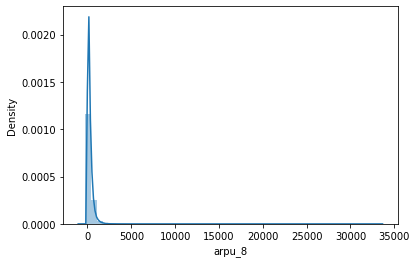

In [196]:
#univariate analysis
univariate(train_df_na.arpu_8)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


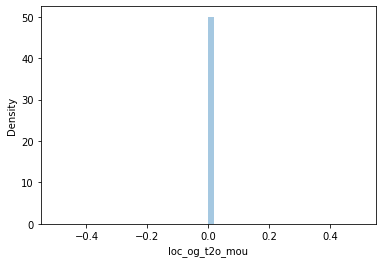

In [197]:
univariate(train_df_na.loc_og_t2o_mou)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


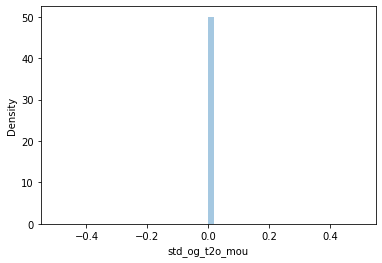

In [198]:
univariate(train_df_na.std_og_t2o_mou)

count    69999.000000
mean       132.978257
std        303.534603
min          0.000000
25%          7.360000
50%         36.790000
75%        132.978257
max      10752.560000
Name: onnet_mou_8, dtype: float64


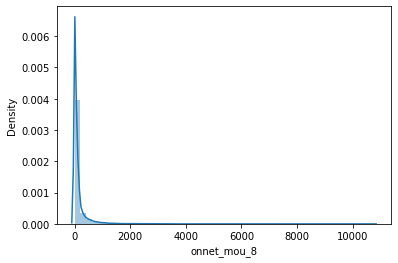

In [199]:
univariate(train_df_na.onnet_mou_8)

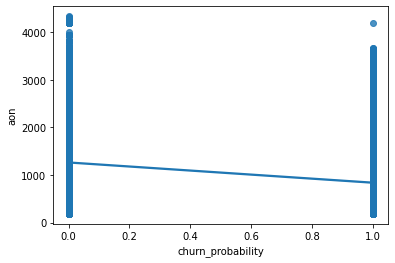

In [200]:
bivariate(train_df_na.churn_probability, train_df_na.aon)

Let's cap outliers and filter out the data

In [201]:
def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [202]:
# cap outliers in the numeric columns
train_df_na = remove_outliers(train_df_na,num_cols)

In [225]:
#dealing with date cols
#remove the cols which have date_ prefix
date_cols = train_df_na.columns[train_df_na.columns.str.startswith('date_')].tolist()
last_date = train_df_na.columns[train_df_na.columns.str.startswith('last_date_')].tolist()
train_df_na = train_df_na.drop(date_cols, axis=1)
train_df_na = train_df_na.drop(last_date, axis=1)


## Modelling

In [227]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [228]:
# change churn to numeric
train_df_na['churn_probability'] = pd.to_numeric(train_df_na['churn_probability'])

In [229]:
# divide data into train and test
X = train_df_na.drop("churn_probability", axis = 1)
y = train_df_na.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [230]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23448, 150)
(23448,)
(7817, 150)
(7817,)


In [231]:
print(train_df_cat_cols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'circle_id']


In [232]:
#aggregating categorical columns
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6').churn_probability.mean())
print(train.groupby('night_pck_user_7').churn_probability.mean())
print(train.groupby('night_pck_user_8').churn_probability.mean())
print(train.groupby('fb_user_6').churn_probability.mean())
print(train.groupby('fb_user_7').churn_probability.mean())
print(train.groupby('fb_user_8').churn_probability.mean())


night_pck_user_6
-1.0    0.058621
0.0     0.048105
1.0     0.043478
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.058129
0.0     0.052487
1.0     0.022727
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.062590
0.0     0.024734
1.0     0.000000
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.058621
0.0     0.060827
1.0     0.045818
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.058129
0.0     0.078341
1.0     0.047525
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.062590
0.0     0.038261
1.0     0.021542
Name: churn_probability, dtype: float64


In [233]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.058621, 0: 0.048105, 1: 0.043478},
           'night_pck_user_7' : {-1: 0.058129, 0: 0.052487, 1: 0.022727},
           'night_pck_user_8' : {-1: 0.062590, 0: 0.024734, 1: 0.000000},
           'fb_user_6'        : {-1: 0.058621, 0: 0.060827, 1: 0.045818},
           'fb_user_7'        : {-1: 0.058129, 0: 0.078341, 1: 0.047525},
           'fb_user_8'        : {-1: 0.062590, 0: 0.038261, 1: 0.021542}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [234]:
# check data type of categorical columns - make sure they are numeric

X_train[[col for col in cat_cols if col not in ['churn_probability']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23448 entries, 28641 to 43690
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  23448 non-null  float64 
 1   night_pck_user_7  23448 non-null  float64 
 2   night_pck_user_8  23448 non-null  float64 
 3   monthly_2g_6      23448 non-null  category
 4   monthly_2g_7      23448 non-null  category
 5   monthly_2g_8      23448 non-null  category
 6   monthly_3g_6      23448 non-null  category
 7   monthly_3g_7      23448 non-null  category
 8   monthly_3g_8      23448 non-null  category
 9   fb_user_6         23448 non-null  float64 
 10  fb_user_7         23448 non-null  float64 
 11  fb_user_8         23448 non-null  float64 
dtypes: category(6), float64(6)
memory usage: 1.4 MB


#### PCA to reduce dimensionality

In [235]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [236]:
X_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
28641,28641,109,0.0,0.0,0.0,78.036,122.238,5.580,14.01,18.86,1.15,55.94,53.53,3.68,0.00,0.0,0.0,0.00,0.0,0.0,14.01,18.86,1.15,55.53,50.19,3.68,0.41,3.33,0.00,0.0,0.0,0.0,69.96,72.39,4.83,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.36,0.58,0.00,1.58,0.0,0.0,71.91,72.98,4.83,5.99,1.01,2.03,40.04,24.46,14.78,1.23,0.00,0.00,47.28,25.48,16.81,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,47.28,25.48,16.81,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,4,6,1,90,150,0,30,50,0,30,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058621,0.058129,0.06259,0,0,0,0,0,0,0,0,0,0,0,0,0.058621,0.058129,0.06259,438,0.0,0.0,0.0
37630,37630,109,0.0,0.0,0.0,130.698,112.584,69.158,5.83,7.03,0.83,87.06,68.06,54.18,0.00,0.0,0.0,0.00,0.0,0.0,5.83,7.03,0.83,87.06,67.54,53.93,0.00,0.00,0.00,0.0,0.0,0.0,92.89,74.58,54.76,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.39,3.86,2.21,2.21,0.0,0.0,95.51,78.44,56.98,2.33,8.58,5.08,79.26,94.29,32.01,0.00,0.00,0.00,81.59,102.88,37.09,0.00,0.15,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.15,0.00,81.81,103.03,37.09,0.21,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,7,4,2,150,130,80,30,50,50,20,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058621,0.058129,0.06259,0,0,0,0,0,0,0,0,0,0,0,0,0.058621,0.058129,0.06259,311,0.0,0.0,0.0
69472,69472,109,0.0,0.0,0.0,103.318,116.519,141.848,15.51,14.58,0.86,52.13,57.39,97.68,0.00,0.0,0.0,0.00,0.0,0.0,15.51,14.58,0.86,49.31,51.86,96.06,2.81,5.53,1.61,0.0,0.0,0.0,67.64,71.98,98.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,67.64,71.98,98.54,1.33,2.20,1.61,670.23,635.56,696.78,0.00,0.00,0.00,671.56,637.76,698.39,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0

In [237]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [238]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.46
1       21.90
2       30.09
3       33.79
4       37.17
5       40.12
6       42.98
7       45.31
8       47.35
9       49.30
10      51.13
11      52.86
12      54.54
13      56.15
14      57.72
15      59.13
16      60.51
17      61.79
18      62.98
19      64.17
20      65.24
21      66.30
22      67.36
23      68.35
24      69.33
25      70.23
26      71.09
27      71.92
28      72.71
29      73.50
30      74.28
31      75.05
32      75.79
33      76.53
34      77.23
35      77.93
36      78.62
37      79.28
38      79.93
39      80.57
40      81.20
41      81.83
42      82.43
43      83.01
44      83.58
45      84.14
46      84.68
47      85.22
48      85.75
49      86.27
50      86.78
51      87.28
52      87.78
53      88.27
54      88.75
55      89.22
56      89.68
57      90.14
58      90.56
59      90.99
60      91.40
61      91.79
62      92.16
63      92.51
64      92.85
65      93.19
66      93.52
67      93.84
68      94.14
69      94.43
70      94.71
71    

Around 60 components explain ```91%``` variance in the data.

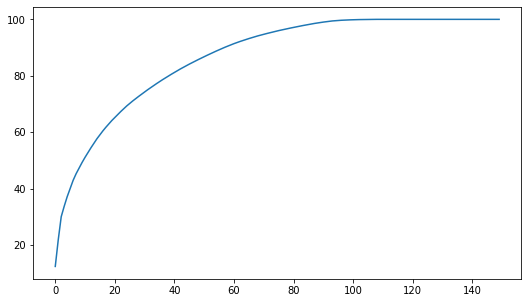

In [239]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

#### Logistic regression with PCA

In [240]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [241]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8005800068236096

#### Evaluating on test data


In [242]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5881 1488]
 [  82  366]]
Sensitivity: 	0.82
Specificity: 	0.8
AUC:    	 0.88


As a base case, we get ```0.88``` as area under the curve and ```0.82``` as sensitivity and ```0.8``` as specificity.

#### Hyper parameter tuning

In [243]:
#class imbalance
y_train.value_counts()/y_train.shape

0    0.942639
1    0.057361
Name: churn_probability, dtype: float64

In [244]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [245]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [246]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.012088,0.079664,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 60}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.499234,0.041205,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 80}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,2.219427,0.077547,0.100589,0.031290,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 60}",0.858065,0.880734,0.890750,0.886044,0.859350,0.874989,0.013672,16
3,2.922001,0.174896,0.155454,0.049308,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}",0.859151,0.884930,0.893180,0.893149,0.864008,0.878884,0.014527,2
4,2.624686,0.149652,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 60}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
5,3.436788,0.031919,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1', 'pca__n_components': 80}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,3.708761,0.468567,0.171869,0.066213,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 60}",0.859236,0.879804,0.891653,0.885759,0.859729,0.875236,0.013399,10
7,4.472914,0.408245,0.147934,0.043618,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}",0.858755,0.884544,0.892926,0.893454,0.864154,0.878766,0.014585,4
8,2.717368,0.257577,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 60}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,2.911911,0.123828,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 80}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [247]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8788870723460371
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [248]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6585  784]
 [ 120  328]]
Sensitivity: 	0.73
Specificity: 	0.89
AUC:    	 0.88


Let's use a random forest classifier now to see how that performs.

In [249]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [250]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [251]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8979102290909633
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [252]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7284   85]
 [ 316  132]]
Sensitivity: 	0.29
Specificity: 	0.99
AUC:    	 0.91


The random forest model seems to have high AUC but very poor sensitivity.

#### choosing/interpreting features


In [253]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [254]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [255]:
# OOB score
rf_model.oob_score_

0.9495905834186285

In [256]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[7301   68]
 [ 340  108]]
Sensitivity: 	0.24
Specificity: 	0.99
ROC:    	 0.91


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [258]:
#feature importance
# predictors
features = train_df_na.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,loc_ic_mou_8,7.302341
1,loc_ic_t2m_mou_8,5.216644
2,total_ic_mou_8,4.932147
3,roam_og_mou_8,4.390448
4,roam_ic_mou_8,3.501466
5,last_day_rch_amt_8,3.090431
6,loc_og_mou_8,3.020485
7,loc_og_t2m_mou_8,2.588285
8,loc_ic_t2t_mou_8,2.222283
9,arpu_8,2.149140


In [259]:
#lets extract top features
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

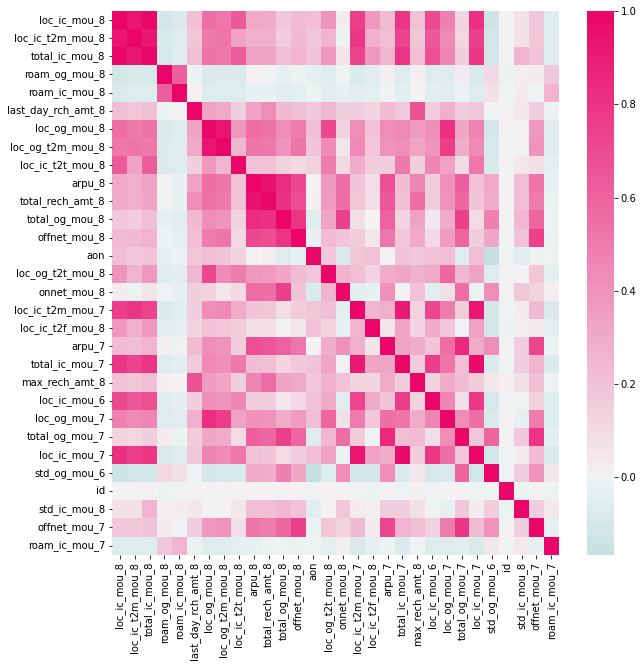

In [260]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [262]:
top_features = ['total_ic_mou_8', 'total_rech_amt_8', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [263]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [264]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [265]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.854818874742233
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [277]:
# predict churn on test data
y_pred = model.predict(X_test)
#export y_pred to csv and have columns as id and churn_probability
y_pred_df = pd.DataFrame(y_pred, columns=['churn_probability'])
y_pred_df.to_csv('y_pred_df.csv', index=False)


# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6532  837]
 [ 147  301]]
Sensitivity: 	0.67
Specificity: 	0.89
ROC:    	 0.85


In [267]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [268]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [269]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [270]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_8,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.758471,-1.237868,-1.099948,-1.142821,0.352914,0.118476,0.420304,0.114373,-0.26574,1.264708


In [288]:
#let's test it on the test.csv file finally
test_df = pd.read_csv('telecom-churn-data/test.csv')
test_df.replace(mapping, inplace = True)
x_test = test_df[top_features]

In [290]:
#replace NaN with 0
x_test = x_test.fillna(0)
x_test.head()

,total_ic_mou_8,total_rech_amt_8,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,36.26,60,57.94,64.445,0.00,0.00,4.34,0.0,28.48
1,281.66,500,415.59,360.868,0.00,0.00,0.00,0.0,17.68
2,0.00,1000,0.00,746.239,26.08,54.44,0.00,0.0,0.00
3,549.13,0,24.01,24.400,0.00,0.00,8.83,0.0,0.00
4,159.26,546,779.78,413.329,0.00,0.00,141.48,0.0,749.29


In [292]:
# predict churn on test data
y_pred = model.predict(x_test)
#export y_pred to csv and have columns as id and churn_probability
y_pred_df = pd.DataFrame(y_pred, columns=['churn_probability'])
#add id column to y_pred_df
y_pred_df['id'] = test_df['id']
#rearrange as id and churn_probability
y_pred_df = y_pred_df[['id', 'churn_probability']]
y_pred_df.to_csv('submission.csv', index=False)